<a href="https://colab.research.google.com/github/jordynconard/Day02_Lab/blob/main/Notebook6_Conard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Jordyn Conard

Date: November 23rd, 2021

## Problem Description: 
How accurate can a trained convolutional neural network for an image recognition task be? In this case, the algorithm will utilize a dataset of chest x-ray images to help learn how to diagnose pneumonia.



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [ ]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys


In [ ]:
## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Enable GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Found GPU at: /device:GPU:0


In [ ]:
## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 5230 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
## Baseline model

## Setting up a sequential model with 3 convolutional layers, each with 32 feature maps
## from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

## Compile the model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
## Train the baseline model
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
164/164 [==============================] - 1131s 7s/step - loss: 0.3137 - accuracy: 0.8715 - val_loss: 0.3684 - val_accuracy: 0.8269
Epoch 2/5
164/164 [==============================] - 20s 122ms/step - loss: 0.1797 - accuracy: 0.9306 - val_loss: 0.4170 - val_accuracy: 0.8173
Epoch 3/5
164/164 [==============================] - 20s 122ms/step - loss: 0.1470 - accuracy: 0.9434 - val_loss: 0.5442 - val_accuracy: 0.7869
Epoch 4/5
164/164 [==============================] - 20s 121ms/step - loss: 0.1304 - accuracy: 0.9512 - val_loss: 0.8063 - val_accuracy: 0.7308
Epoch 5/5
164/164 [==============================] - 20s 121ms/step - loss: 0.1167 - accuracy: 0.9556 - val_loss: 0.5464 - val_accuracy: 0.7997


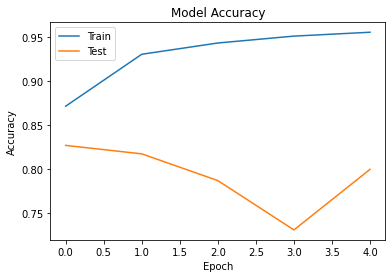

In [ ]:
## Baseline model graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
## Tuned CNN
model2 = Sequential()
model2.add(Conv2D(32, (4, 4), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (4, 4),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (4, 4),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (4, 4),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

## Complile the model
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Train tuned model
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
164/164 [==============================] - 23s 128ms/step - loss: 0.5731 - accuracy: 0.7428 - val_loss: 0.6439 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 20s 122ms/step - loss: 0.3863 - accuracy: 0.8163 - val_loss: 0.3813 - val_accuracy: 0.8381
Epoch 3/10
164/164 [==============================] - 20s 125ms/step - loss: 0.2024 - accuracy: 0.9155 - val_loss: 0.6678 - val_accuracy: 0.7580
Epoch 4/10
164/164 [==============================] - 20s 123ms/step - loss: 0.1528 - accuracy: 0.9400 - val_loss: 1.1817 - val_accuracy: 0.6907
Epoch 5/10
164/164 [==============================] - 20s 121ms/step - loss: 0.1410 - accuracy: 0.9455 - val_loss: 0.6211 - val_accuracy: 0.7772
Epoch 6/10
164/164 [==============================] - 20s 120ms/step - loss: 0.1224 - accuracy: 0.9535 - val_loss: 1.1494 - val_accuracy: 0.7051
Epoch 7/10
164/164 [==============================] - 20s 121ms/step - loss: 0.1296 - accuracy: 0.9509 - val_loss: 0.7199 - val_ac

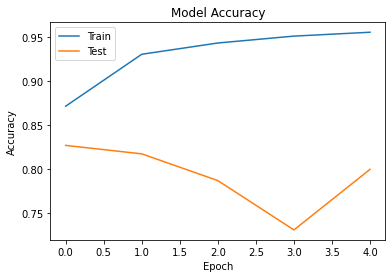

In [ ]:
## Tuned model graph
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
## SECOND TUNED
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (5, 5),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (5, 5),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (5, 5),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (5, 5),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

## Complile the model
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Train tuned model
training_results3 = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
164/164 [==============================] - 23s 132ms/step - loss: 0.5664 - accuracy: 0.7428 - val_loss: 0.6535 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 21s 126ms/step - loss: 0.3928 - accuracy: 0.8268 - val_loss: 0.5168 - val_accuracy: 0.7869
Epoch 3/10
164/164 [==============================] - 21s 126ms/step - loss: 0.2510 - accuracy: 0.8967 - val_loss: 0.4573 - val_accuracy: 0.8045
Epoch 4/10
164/164 [==============================] - 21s 126ms/step - loss: 0.1793 - accuracy: 0.9272 - val_loss: 0.6957 - val_accuracy: 0.7580
Epoch 5/10
164/164 [==============================] - 21s 126ms/step - loss: 0.1612 - accuracy: 0.9346 - val_loss: 0.4533 - val_accuracy: 0.8173
Epoch 6/10
164/164 [==============================] - 20s 124ms/step - loss: 0.1404 - accuracy: 0.9470 - val_loss: 0.8160 - val_accuracy: 0.7420
Epoch 7/10
164/164 [==============================] - 21s 125ms/step - loss: 0.1237 - accuracy: 0.9518 - val_loss: 1.0123 - val_ac

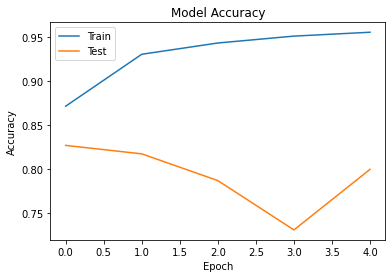

In [ ]:
## Tuned model graph
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Conclusion
####What configuration of your CNN proved to be more accurate? Why do you think this is the case?

The configuration of my CNN that proved to be the most accurate is the second tuned model. I believe this is the case because of the amount/type of layers.

####How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.



